In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import random as python_random
from sklearn.metrics import classification_report, multilabel_confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import sys
sys.path.append('/content/drive/MyDrive')
!ls /content/drive/MyDrive/Input_in_NLP

 binary_alpha_digits_images.npy   Lesson_1.ipynb   Lesson_3.ipynb
 binary_alpha_digits_labels.npy   Lesson_2.ipynb  'wine-dataset (1).ipynb'


# Домашнее задание

# Датасет с винами

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

In [4]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [5]:
data = load_wine()

In [6]:
list(data.target_names)

['class_0', 'class_1', 'class_2']

In [7]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
data.data.shape, data.target.shape

((178, 13), (178,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.25, shuffle=True, random_state=0)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133, 13), (45, 13), (133,), (45,))

In [11]:
sc = StandardScaler(with_mean=True, with_std=True)

X_train_std = sc.fit_transform(X_train)

X_test_std = sc.transform(X_test)
    
Y_train = to_categorical(y_train, 3)
Y_test  = to_categorical(y_test, 3)

In [12]:
model = Sequential()
model.add(Dense(100, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l2()))
model.add(Dense(64, activation='relu', kernel_regularizer=l2()))
model.add(Dense(3, activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
history = model.fit(X_train_std, Y_train, batch_size=128, epochs=32, verbose=0, validation_split=0.25)

In [18]:
model.evaluate(X_test_std, Y_test, verbose=1)

2/2 [==============================] - 0s 4ms/step - loss: 0.8772 - accuracy: 1.0000


[0.8771544694900513, 1.0]

In [19]:
predictions = model.predict(X_test_std)

In [20]:
print(classification_report(Y_test.argmax(-1), predictions.argmax(-1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         8

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [21]:
print(multilabel_confusion_matrix(Y_test.argmax(-1), predictions.argmax(-1)))

[[[29  0]
  [ 0 16]]

 [[24  0]
  [ 0 21]]

 [[37  0]
  [ 0  8]]]


In [22]:
history.model

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1400      
                                                                 
 dense_1 (Dense)             (None, 64)                6464      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 8,059
Trainable params: 8,059
Non-trainable params: 0
_________________________________________________________________


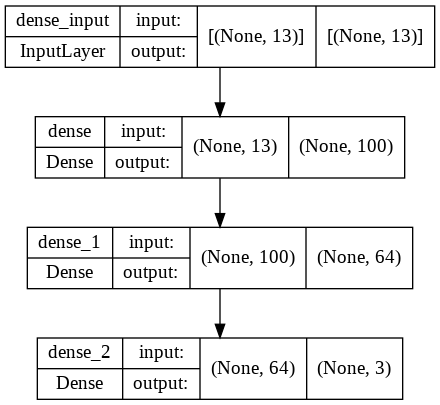

In [24]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

# Датасет с рукописными буквами

https://www.tensorflow.org/datasets/catalog/binary_alpha_digits

In [44]:
classes = [str(i) for i in range(10)] +  list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
print(classes)

X = np.load('drive/MyDrive/Input_in_NLP/binary_alpha_digits_images.npy')
Y = np.load('drive/MyDrive/Input_in_NLP/binary_alpha_digits_labels.npy')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [45]:
X.shape, Y.shape

((1404, 20, 16), (1404,))

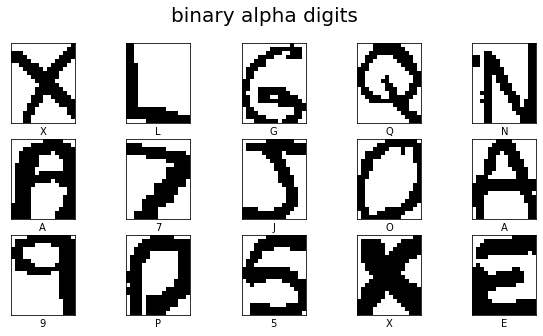

In [46]:
fig, axes = plt.subplots(3, 5, figsize=(10, 5))
fig.suptitle('binary alpha digits', fontsize=20)
n = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(X[n], cmap=plt.cm.binary)
    ax.set_xlabel(classes[Y[n]])
    n += 1

In [47]:
train_images, test_images, train_labels, test_labels = train_test_split(X, Y, test_size=0.25, shuffle=True, random_state=0)

In [48]:
train_images = (train_images / 255)
test_images = (test_images / 255)

print(train_images.shape)
print(train_labels.shape)

(1053, 20, 16)
(1053,)


In [91]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20, 16)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(36)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [92]:
hstr = model.fit(train_images, train_labels, epochs=120, verbose=0)

In [93]:
hstr.params

{'epochs': 120, 'steps': 33, 'verbose': 0}

In [94]:
hstr.model

In [95]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 320)               0         
                                                                 
 dense_77 (Dense)            (None, 256)               82176     
                                                                 
 dense_78 (Dense)            (None, 128)               32896     
                                                                 
 dense_79 (Dense)            (None, 64)                8256      
                                                                 
 dense_80 (Dense)            (None, 36)                2340      
                                                                 
Total params: 125,668
Trainable params: 125,668
Non-trainable params: 0
_________________________________________________________________


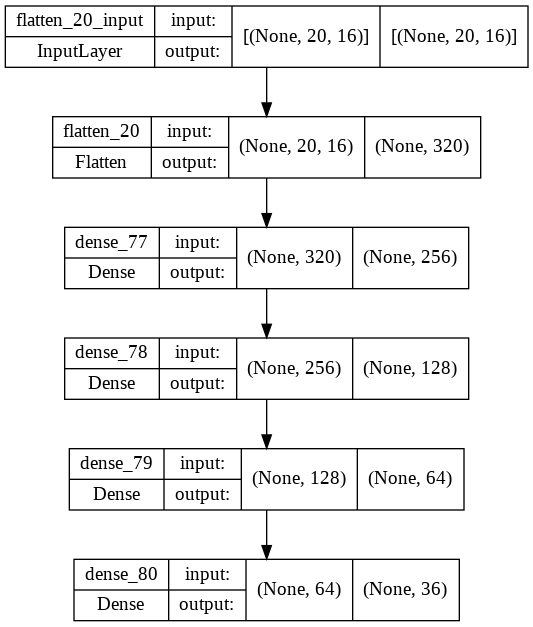

In [96]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [97]:
model.predict(test_images)

array([[-67.48269  ,   1.4839563, -10.887823 , ...,   3.413132 ,
          5.4024878, -44.00859  ],
       [-12.703959 ,  -5.204586 , -22.014158 , ..., -20.092537 ,
        -30.727621 , -24.046837 ],
       [-14.589523 ,  -5.892808 ,  -5.2090983, ...,  -8.935032 ,
         -1.1967378,  -4.091234 ],
       ...,
       [-42.941444 , -10.636898 , -34.238575 , ..., -17.556246 ,
         -4.8824844, -52.613693 ],
       [-17.37673  ,  -0.8329927,   2.9120848, ..., -10.140375 ,
        -25.536299 ,   5.813841 ],
       [ -8.023395 ,  -7.7661605,   4.3985634, ..., -29.988712 ,
        -45.76386  ,  15.037716 ]], dtype=float32)